<h1>About Dataset</h1>
<h2>Dataset Overview</h2>
<p>The <strong>Spending Patterns Dataset</strong> provides a synthetic representation of consumer spending behavior across various categories. This dataset is ideal for exploratory data analysis, statistical modeling, and machine learning applications related to financial forecasting, customer segmentation, or consumer behavior analysis.</p>
<h2>Dataset Features</h2>
<p>The dataset contains 10,000 transactions for 200 unique customers. Each transaction is associated with detailed information, including category, item, quantity, price, payment method, and transaction date.</p>
Data Source from Kaggle <br/>
<a href="https://www.kaggle.com/datasets/ahmedmohamed2003/spending-habits">Spending Habits</a>

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.stats import chi2_contingency

#### 1. Data Collecting

In [2]:
df = pd.read_csv("spending_patterns_detailed.csv")
df.head()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,CUST_0159,Groceries,Milk,1,1.28,1.28,Debit Card,Mobile App,2024-11-13
1,CUST_0017,Friend Activities,Dinner with Friends,2,74.69,149.39,Debit Card,In-store,2023-05-04
2,CUST_0094,Housing and Utilities,Water Bill,1,76.06,76.06,Digital Wallet,Mobile App,2023-12-16
3,CUST_0162,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28
4,CUST_0129,Gifts,Flowers,3,43.71,131.12,Debit Card,In-store,2023-07-28


In [3]:
df.shape

(10000, 9)

#### 2. Data Preprocessing

In [4]:
df.isnull().sum()

Customer ID         0
Category            0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [5]:
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Customer ID, Category, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, Transaction Date]
Index: []


In [6]:
df.dtypes

Customer ID          object
Category             object
Item                 object
Quantity              int64
Price Per Unit      float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
dtype: object

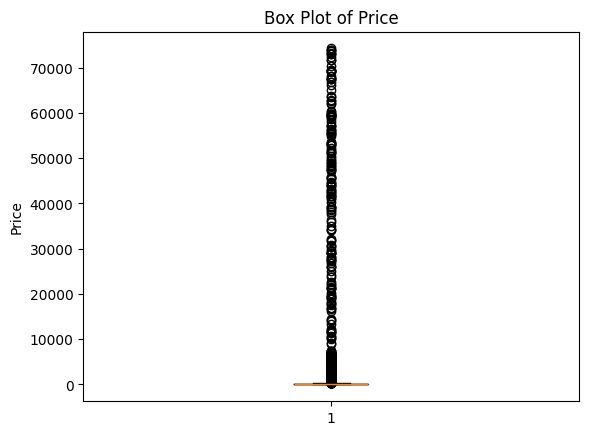

In [ ]:
plt.boxplot(df['Price Per Unit'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()


In [ ]:
# Calculate Q1, Q3, dan IQR
Q1 = df['Price Per Unit'].quantile(0.25)  # Kuartil Pertama (25%)
Q3 = df['Price Per Unit'].quantile(0.75)  # Kuartil Ketiga (75%)
IQR = Q3 - Q1                   # Interquartile Range
# Tentukan batas outlier
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify Outliers
outliers = df[(df['Price Per Unit'] < lower_bound) | (df['Price Per Unit'] > upper_bound)]

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print("Outliers:")
print(outliers)

Q1: 12.96
Q3: 177.58749999999998
IQR: 164.62749999999997
Lower Bound: -233.98124999999996
Upper Bound: 424.52874999999995
Outliers:
     Customer ID               Category          Item  Quantity  \
8      CUST_0116                 Travel  Plane Ticket         1   
16     CUST_0065               Shopping           Car         4   
36     CUST_0073               Shopping           Car         1   
40     CUST_0043         Medical/Dental  Doctor Visit         1   
46     CUST_0024                 Travel  Plane Ticket         1   
...          ...                    ...           ...       ...   
9974   CUST_0168  Housing and Utilities          Rent         1   
9980   CUST_0140  Housing and Utilities          Rent         1   
9981   CUST_0064               Shopping   Electronics         3   
9986   CUST_0050               Shopping           Car         1   
9997   CUST_0122               Shopping   Electronics         1   

      Price Per Unit  Total Spent  Payment Method    Location  

<strong>In this case, I would not remove the outlier because it has an important insight and its existence still makes sense.<strong/><br/>
<p>These outliers or extreme values ​​are not errors because the price per unit, for example, for a car item is definitely very different from the others<p/>

#### 3. Exploratory Data Analysis (EDA)

In [9]:
df.describe(include='all')

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000,10000,10000
unique,200,13,48,NaN,NaN,NaN,4,3,744
top,CUST_0142,Groceries,Dentist Visit,NaN,NaN,NaN,Digital Wallet,In-store,2023-12-29
freq,72,799,278,NaN,NaN,NaN,2560,3387,28
mean,NaN,NaN,NaN,2.237200,969.957948,2534.750890,NaN,NaN,NaN
std,NaN,NaN,NaN,1.481133,6104.403843,19676.741772,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.110000,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,12.960000,25.957500,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,51.860000,88.115000,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,177.587500,336.375000,NaN,NaN,NaN


##### 1. Purchase Frequency

In [12]:
# Pivot Data
pivot_data = df.pivot_table(values="Quantity", index="Category", columns="Item", aggfunc="sum", fill_value=0)

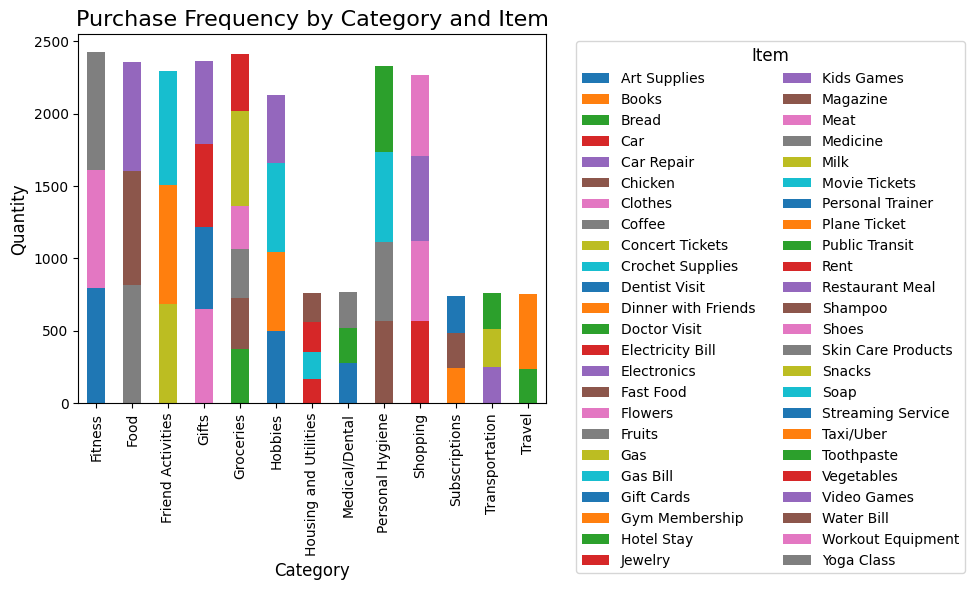

In [20]:
# Plot stacked bar chart
pivot_data.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title("Purchase Frequency by Category and Item", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.legend(title="Item", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10, title_fontsize=12, ncol=2)
plt.tight_layout()
plt.show()

In [21]:
# Total Quantity per Category
category_summary = df.groupby("Category")["Quantity"].sum().reset_index()
# Total Quantity per Item
item_summary = df.groupby("Item")["Quantity"].sum().reset_index()

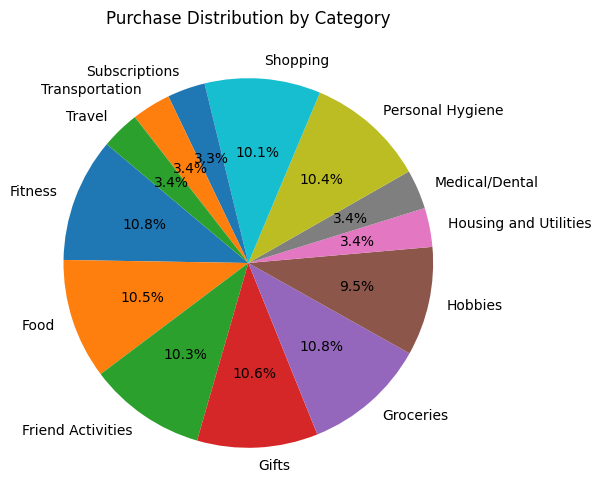

In [22]:
# Plot
plt.figure(figsize=(8, 6))
plt.pie(category_summary["Quantity"], labels=category_summary["Category"], autopct='%1.1f%%', startangle=140)
plt.title("Purchase Distribution by Category")
plt.show()

##### 2. Frequently purchased products

In [23]:
# Calculate total purchases per item
item_summary = df.groupby("Item")["Quantity"].sum().reset_index()
# Sort by number of purchases (descending)
item_summary = item_summary.sort_values(by="Quantity", ascending=False)
# Top 10 frequently purchased products
print(item_summary.head(10))

                   Item  Quantity
11  Dinner with Friends       823
47           Yoga Class       819
7                Coffee       815
46    Workout Equipment       813
30     Personal Trainer       795
29        Movie Tickets       787
15            Fast Food       787
34      Restaurant Meal       753
8       Concert Tickets       686
16              Flowers       651


##### 3. Amount spent

In [25]:
# Average Amount Spent per Category
avg_spent_category = df.groupby("Category")["Total Spent"].mean().reset_index()
# Average Amount Spent per Item
avg_spent_item = df.groupby("Item")["Total Spent"].mean().reset_index()

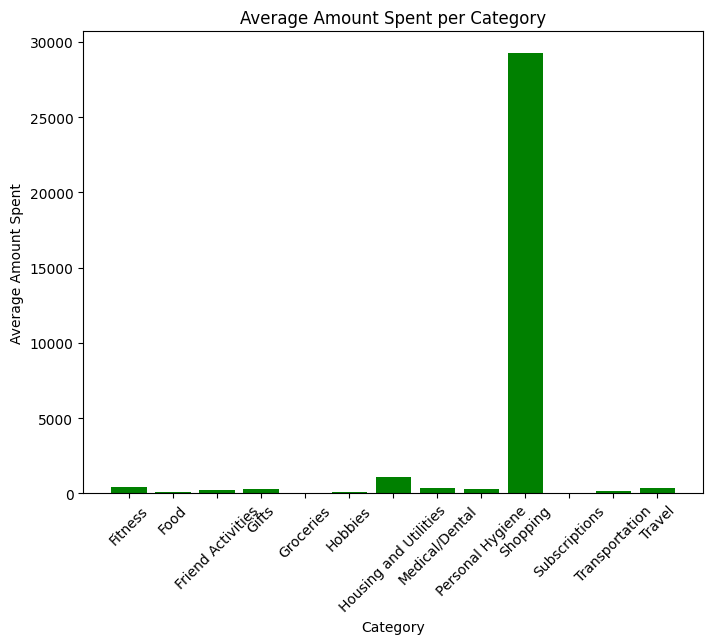

In [26]:
# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(avg_spent_category["Category"], avg_spent_category["Total Spent"], color="green")
plt.title("Average Amount Spent per Category")
plt.xlabel("Category")
plt.ylabel("Average Amount Spent")
plt.xticks(rotation=45)
plt.show()

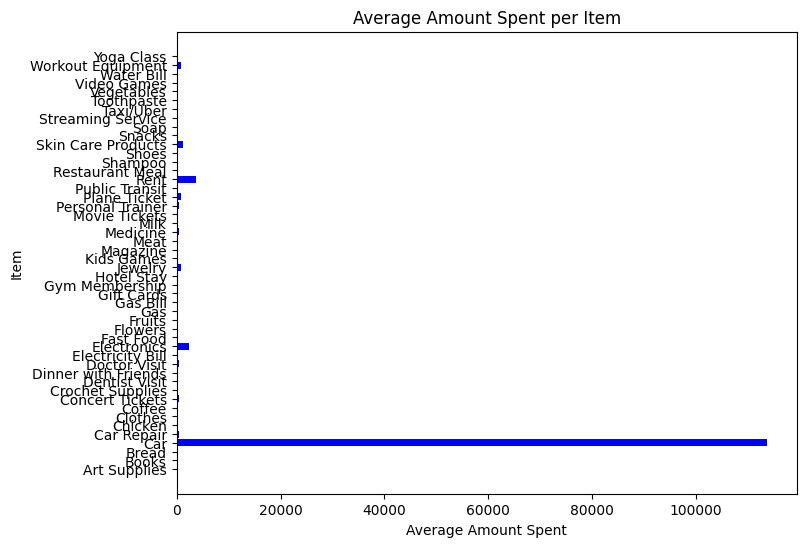

In [27]:
# Horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(avg_spent_item["Item"], avg_spent_item["Total Spent"], color="blue")
plt.title("Average Amount Spent per Item")
plt.xlabel("Average Amount Spent")
plt.ylabel("Item")
plt.show()

In [34]:
# Filter item di kategori 'Clothing'
shopping_items = df.loc[df["Category"] == "Shopping"]
shopping_items

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
16,CUST_0065,Shopping,Car,4,59807.04,239228.17,Digital Wallet,In-store,2023-11-27
17,CUST_0136,Shopping,Shoes,1,122.22,122.22,Cash,In-store,2023-11-29
20,CUST_0041,Shopping,Clothes,3,37.80,113.40,Credit Card,Online,2024-11-06
30,CUST_0180,Shopping,Shoes,2,101.80,203.60,Credit Card,Mobile App,2024-06-13
36,CUST_0073,Shopping,Car,1,48275.65,48275.65,Debit Card,In-store,2023-09-30
...,...,...,...,...,...,...,...,...,...
9954,CUST_0147,Shopping,Car,1,52249.94,52249.94,Debit Card,Online,2024-07-07
9977,CUST_0153,Shopping,Shoes,3,61.20,183.59,Credit Card,Online,2023-04-22
9981,CUST_0064,Shopping,Electronics,3,652.09,1956.28,Cash,Online,2024-05-13
9986,CUST_0050,Shopping,Car,1,7477.15,7477.15,Digital Wallet,Mobile App,2025-01-04


##### 4. Look for patterns related to Payment Method and Location

<strong>From the descriptive analysis that has been carried out, is there anything to do with Payment Method or Location which influences both each category and each product or item?<strong/>

In [13]:
# Function for make grouped bar chart
def plot_bar_chart(categories, target, aggregated_data, tlabel='Payment Method', xlabel='Category', ylabel='Total Quantity', title='Total Quantity per Category and Location'):
    """
    Plots a grouped bar chart for total quantities per category and location.

    Parameters:
    - categories (list): List of categories to be displayed on the x-axis.
    - target (list): List of locations (or methods) for grouping bars.
    - aggregated_data (DataFrame): DataFrame containing 'Category', 'Location', and 'Quantity' columns.
    - tlabel: Label or name for the target.
    - xlabel (str): Label for the x-axis. Default is 'Category'.
    - ylabel (str): Label for the y-axis. Default is 'Total Quantity'.
    """
    # Determine the bar position for each category
    x = np.arange(len(categories))  # Location of categories on the x-axis
    bar_width = 0.2  # Width of each bar

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot data for each location/method
    for i, method in enumerate(target):
        bar_positions = x + i * bar_width
        values = [
            aggregated_data[(aggregated_data[xlabel] == category) & (aggregated_data[tlabel] == method)]['Quantity'].sum()
            for category in categories
        ]
        ax.bar(bar_positions, values, bar_width, label=method)

    # Customize axes and labels
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.set_xticks(x + bar_width * (len(target) - 1) / 2)
    ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)
    ax.legend(title=tlabel, fontsize=8, loc='upper right', bbox_to_anchor=(0.4, -0.15), ncol=len(target))

    # Add a grid for easier reading
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout and display the chart
    plt.tight_layout()
    plt.show()

##### 1. Categories

From the purchase frequency by category which can be seen using both a bar chart and a pie chart.

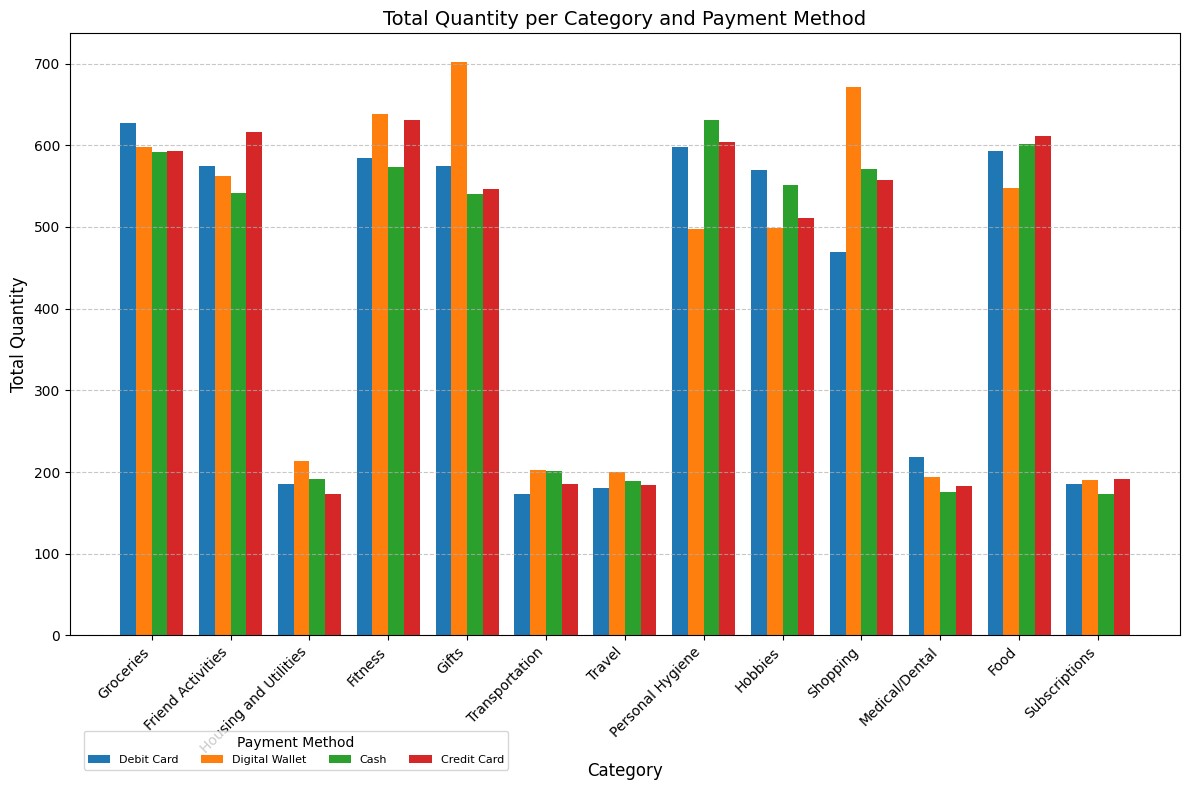

In [8]:
# Define unique payment categories and methods
categories = df['Category'].unique()
payment_methods = df['Payment Method'].unique()
# Aggregation of amounts per category and payment method
aggregated_category = df.groupby(['Category', 'Payment Method'])['Quantity'].sum().reset_index()
plot_bar_chart(categories, payment_methods, aggregated_category, "Payment Method", "Category", "Total Quantity", "Total Quantity per Category and Payment Method")

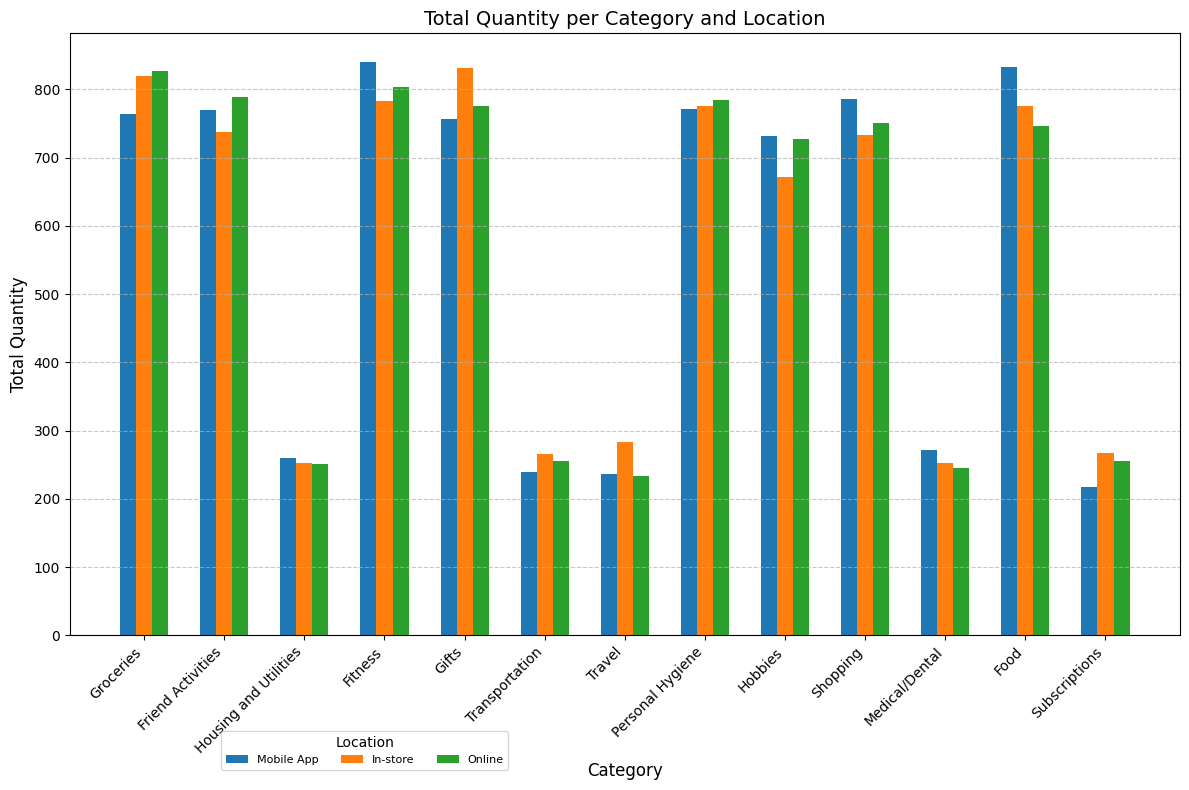

In [9]:
# Define unique payment categories and location
categories = df['Category'].unique()
locat = df['Location'].unique()
# Aggregation of amounts per category and location
aggregated_loc = df.groupby(['Category', 'Location'])['Quantity'].sum().reset_index()
plot_bar_chart(categories,locat, aggregated_loc, "Location", 'Category', 'Total Quantity', 'Total Quantity per Category and Location')

##### 2. Items

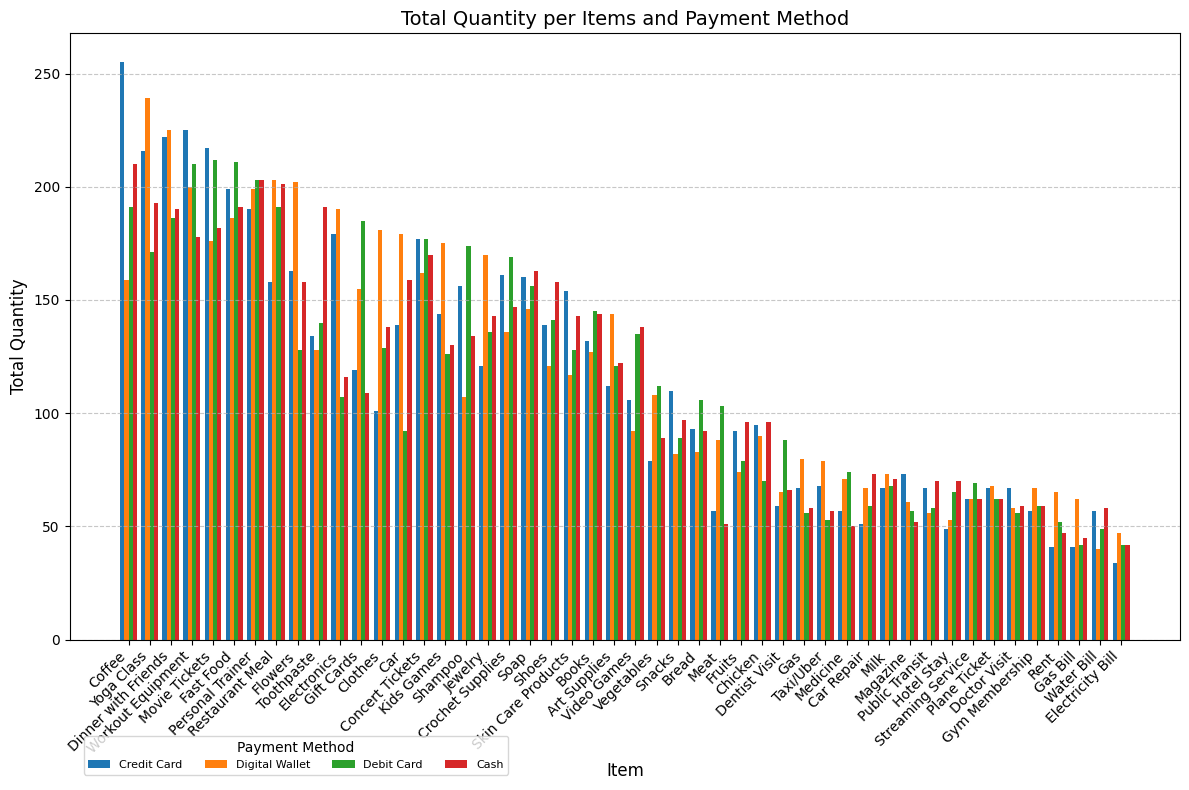

In [17]:
# Calculate total purchases per item and payment method
item_pay_summary = df.groupby(["Item","Payment Method"])["Quantity"].sum().reset_index()
# Sort by number of purchases (descending)
item_pay_summary = item_pay_summary.sort_values(by="Quantity", ascending=False)
# # Top purchased items
# top_item_pay_summary = item_pay_summary.head(16)
# Define uniqe item and payment method
items = item_pay_summary['Item'].unique()
pay_method = item_pay_summary['Payment Method'].unique()

# Plotting the result
plot_bar_chart(items, pay_method, item_pay_summary, 'Payment Method', 'Item', 'Total Quantity', 'Total Quantity per Items and Payment Method')

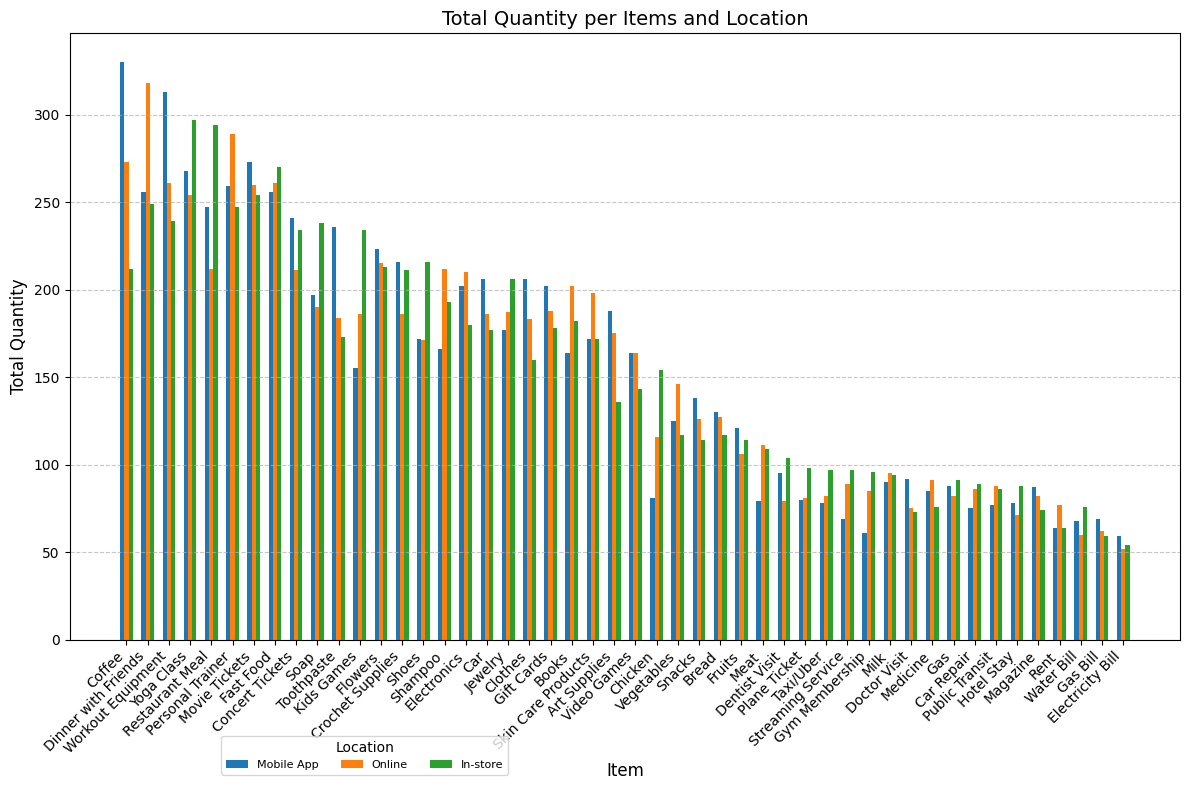

In [18]:
# Calculate total purchases per item and location
item_pay_summary = df.groupby(["Item","Location"])["Quantity"].sum().reset_index()
# Sort by number of purchases (descending)
item_pay_summary = item_pay_summary.sort_values(by="Quantity", ascending=False)
# Top purchased items
# top_item_pay_summary = item_pay_summary.head(15)
# Define uniqe item and payment method
items = item_pay_summary['Item'].unique()
item_loc = item_pay_summary['Location'].unique()
# Plotting the result
plot_bar_chart(items, item_loc, item_pay_summary, 'Location', 'Item', 'Total Quantity', 'Total Quantity per Items and Location')

Until this phase, I still haven't found a special pattern. So, I had to do a more in-depth search

##### 3. Proportion of Payment Method and Location

In [8]:
# Grouping payment method and location into two parts
df['payment_method_grouped'] = df['Payment Method'].replace({
    'Cash': 'Cash',
    'Credit Card': 'Non-Cash',
    'Debit Card': 'Non-Cash',
    'Digital Wallet': 'Non-Cash'
})
# Mengelompokkan location
df['location_grouped'] = df['Location'].replace({
    'In-Store': 'In-Store',
    'Mobile App': 'Off-Store',
    'Online': 'Off-Store'
})

In [6]:
# Calculate total quantity based on Payment Methods and Location
payment_location_summary = df.groupby(['payment_method_grouped', 'location_grouped'])['Quantity'].sum().reset_index()

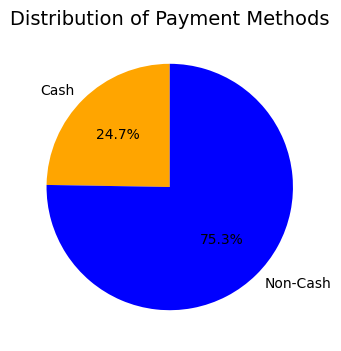

In [9]:
# Pie chart for Payment Methods
payment_summary = payment_location_summary.groupby('payment_method_grouped')['Quantity'].sum()
plt.figure(figsize=(5, 4))
plt.pie(payment_summary, labels=payment_summary.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])
plt.title('Distribution of Payment Methods', fontsize=14)
plt.show()

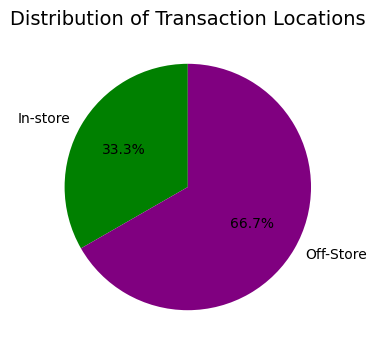

In [11]:
# Pie chart for Locations
location_summary = payment_location_summary.groupby('location_grouped')['Quantity'].sum()
plt.figure(figsize=(5, 4))
plt.pie(location_summary, labels=location_summary.index, autopct='%1.1f%%', startangle=90, colors=['green', 'purple'])
plt.title('Distribution of Transaction Locations', fontsize=14)
plt.show()

##### 4. Trend Analysis

In [40]:
# Converts a date column to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
# Added additional time column
df['month'] = df['Transaction Date'].dt.to_period('M')

In [41]:
# Filter the data to remove January 2025 for better visualization
filtered_df = df[df['month'] != '2025-01']

In [42]:
# Aggregation of total quantity based on time and payment method
payment_trend = filtered_df.groupby(['month', 'payment_method_grouped'])['Total Spent'].sum().unstack()
# Aggregation of total quantity based on transaction time and location
location_trend = filtered_df.groupby(['month', 'location_grouped'])['Total Spent'].sum().unstack()

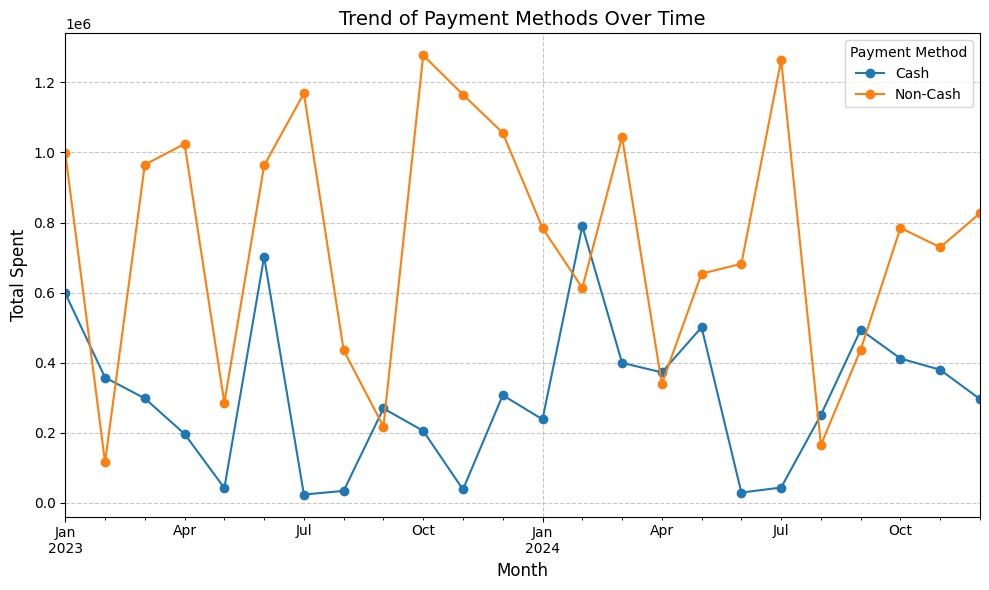

In [45]:
# line chart for trend Payment Method
payment_trend.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Trend of Payment Methods Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Spent', fontsize=12)
plt.legend(title='Payment Method', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

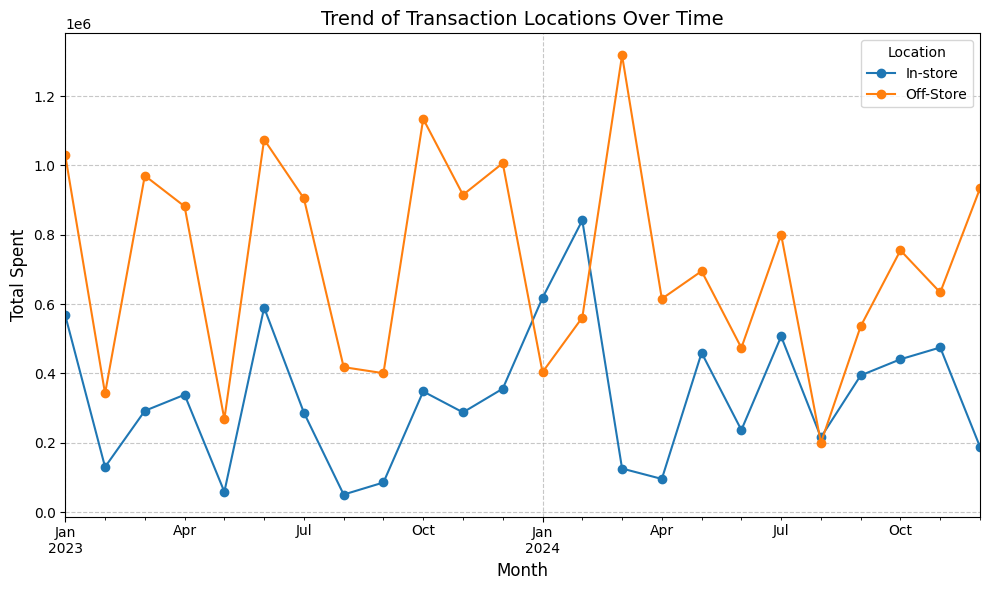

In [46]:
# line chart for trend Location
location_trend.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Trend of Transaction Locations Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Spent', fontsize=12)
plt.legend(title='Location', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 5. Comparison between cash and non-cash; In-store and Off-store

In [6]:
# Pivot data
pivot = df.pivot_table(
    index="Category", 
    columns="Payment Method", 
    values="Quantity", 
    aggfunc="sum"
)

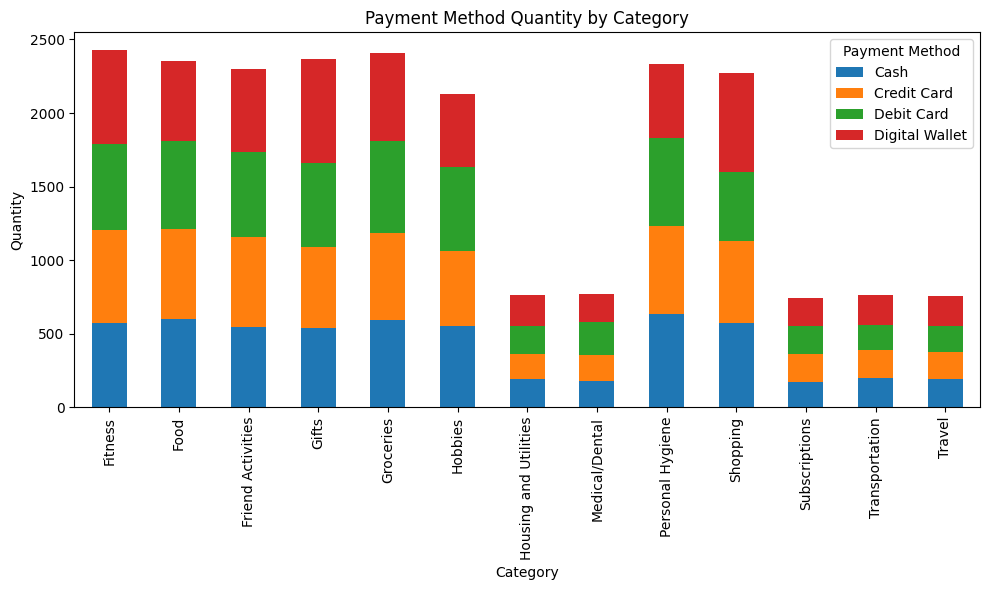

In [7]:
# Plot
pivot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Payment Method Quantity by Category")
plt.ylabel("Quantity")
plt.xlabel("Category")
plt.legend(title="Payment Method")
plt.tight_layout()
plt.show()

In [11]:
result = df.groupby(['location_grouped','payment_method_grouped','Item'])['Quantity'].sum()

In [17]:
result

location_grouped  payment_method_grouped  Item             
In-store          Cash                    Art Supplies          33
                                          Books                 33
                                          Bread                 14
                                          Car                   57
                                          Car Repair            24
                                                              ... 
Off-Store         Non-Cash                Vegetables           202
                                          Video Games          231
                                          Water Bill            90
                                          Workout Equipment    452
                                          Yoga Class           405
Name: Quantity, Length: 192, dtype: int64

In [27]:
# Change the 'Transaction Date' column to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
# Add a 'Year' column to make filtering easier
df['Year'] = df['Transaction Date'].dt.year


In [28]:
pay_methods = df.groupby(['Year', 'payment_method_grouped'])['Quantity'].sum().reset_index()
loc_tranc = df.groupby(['Year', 'location_grouped'])['Quantity'].sum().reset_index()

In [32]:
loc_tranc

,Year,location_grouped,Quantity
0,2023,In-store,3695
1,2023,Off-Store,7239
2,2024,In-store,3620
3,2024,Off-Store,7433
4,2025,In-store,134
5,2025,Off-Store,251


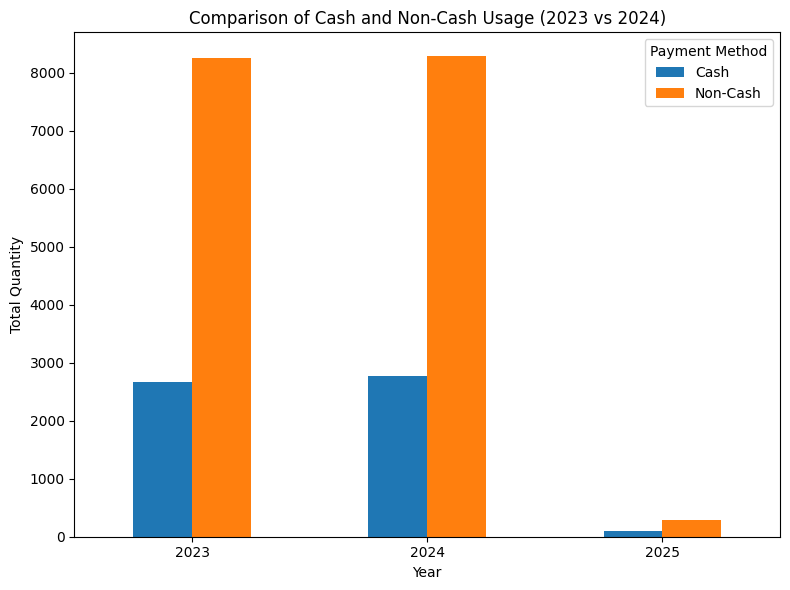

In [30]:
pay_method_pivot = pay_methods.pivot(index='Year', columns='payment_method_grouped', values='Quantity')
# Plot bar chart
pay_method_pivot.plot(kind='bar', figsize=(8, 6))
plt.title('Comparison of Cash and Non-Cash Usage (2023 vs 2024)')
plt.ylabel('Total Quantity')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

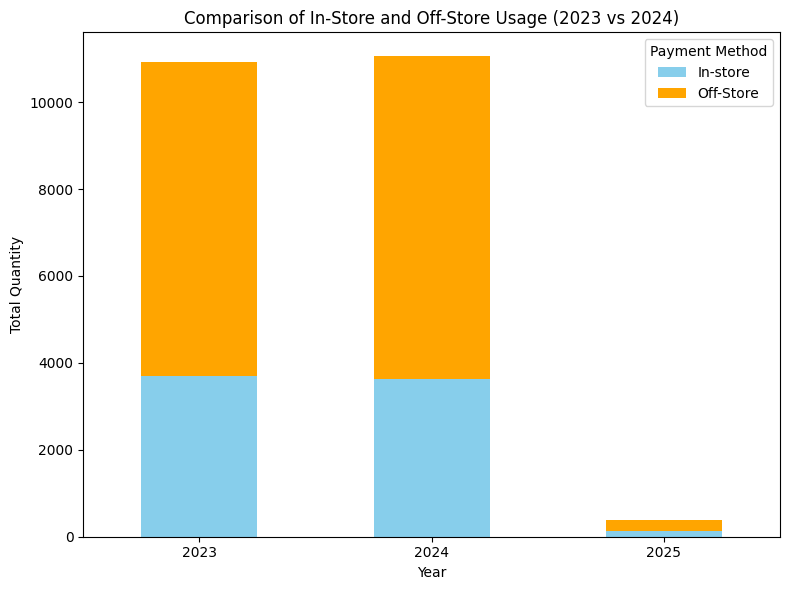

In [34]:
loc_tranc_pivot = loc_tranc.pivot(index='Year', columns='location_grouped', values='Quantity')
# Plot stacked bar chart
loc_tranc_pivot.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange'])
plt.title('Comparison of In-Store and Off-Store Usage (2023 vs 2024)')
plt.ylabel('Total Quantity')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()


##### 6. Comparison between Payment Methods and Locations

In [35]:
pay_methods = df.groupby(['Year', 'Payment Method'])['Quantity'].sum().reset_index()
loc_tranc = df.groupby(['Year', 'Location'])['Quantity'].sum().reset_index()

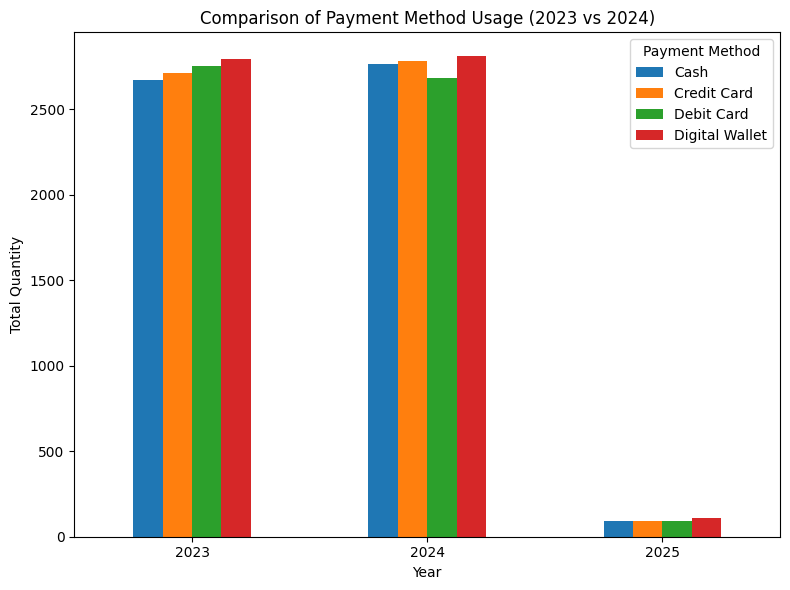

In [37]:
pay_method_pivot = pay_methods.pivot(index='Year', columns='Payment Method', values='Quantity')
# Plot bar chart
pay_method_pivot.plot(kind='bar', figsize=(8, 6))
plt.title('Comparison of Payment Method Usage (2023 vs 2024)')
plt.ylabel('Total Quantity')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

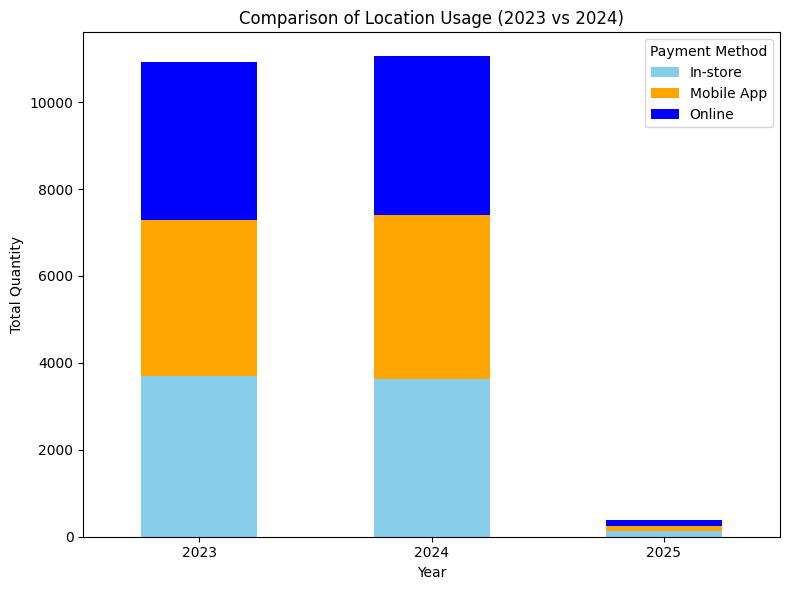

In [ ]:
loc_tranc_pivot = loc_tranc.pivot(index='Year', columns='Location', values='Quantity')
# Plot stacked bar chart
loc_tranc_pivot.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange','blue'])
plt.title('Comparison of Location Usage (2023 vs 2024)')
plt.ylabel('Total Quantity')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

#### 4. Statistical Relationship Testing

In [23]:
df.columns

Index(['Customer ID', 'Category', 'Item', 'Quantity', 'Price Per Unit',
       'Total Spent', 'Payment Method', 'Location', 'Transaction Date',
       'Month'],
      dtype='object')

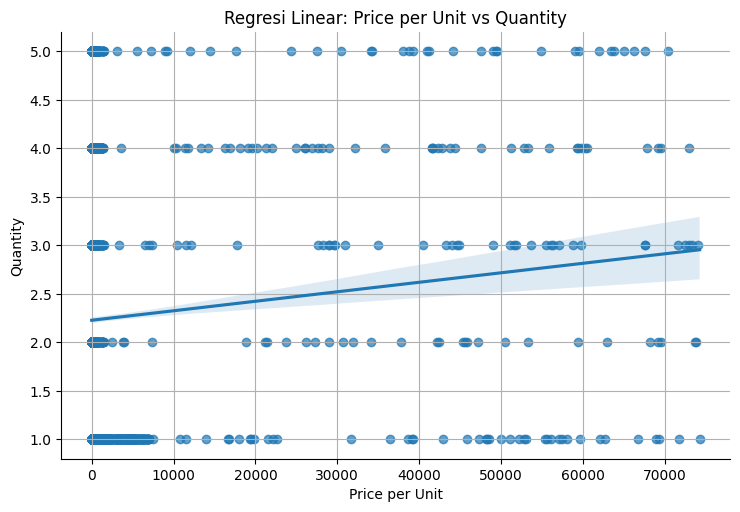

In [25]:
sns.lmplot(x='Price Per Unit', y='Quantity', data=df, aspect=1.5, scatter_kws={'alpha': 0.7})
plt.title('Regresi Linear: Price per Unit vs Quantity')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

In [3]:
# Pearson and Spearman
pearson_corr, _ = pearsonr(df['Price Per Unit'], df['Quantity'])
spearman_corr, _ = spearmanr(df['Price Per Unit'], df['Quantity'])

print(f"Pearson: {pearson_corr:.2f}")
print(f"Spearman: {spearman_corr:.2f}")

Pearson: 0.04
Spearman: -0.22


<strong>Price Per Unit and Quantity</strong><br/>
<strong>1. Pearson:</strong> A value of 0.04 indicates that the linear relationship between the two variables is very weak or almost non-existent. <br/>
<strong>2. Spearman: </strong> The value -0.22 indicates a weak and negative monotonic relationship.

In [29]:
contingency_table = pd.crosstab(df['Location'], df['Payment Method'])

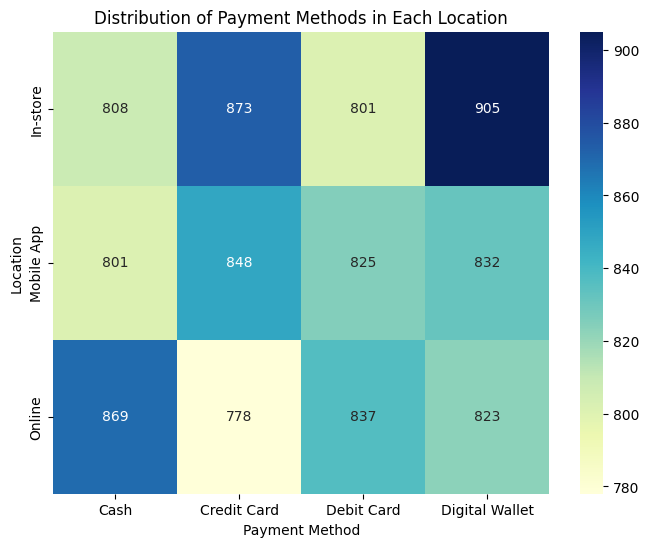

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribution of Payment Methods in Each Location')
plt.xlabel('Payment Method')
plt.ylabel('Location')
plt.show()

In [35]:
# Contingency Table
contingency_table = pd.pivot_table(df, values='Quantity', index='Location', columns='Payment Method', aggfunc='sum', fill_value=0)
print("Contingency Table:\n", contingency_table)

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Chi-Square Test Results
print(f"\nChi-Square: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:\n", expected)

# Interpretation of Results
if p < 0.05:
    print("\nConclusion: There is a significant relationship between Location and Payment Method (reject H₀).")
else:
    print("\nConclusion: There is no significant relationship between Location and Payment Method (failed to reject H₀).")

Contingency Table:
 Payment Method  Cash  Credit Card  Debit Card  Digital Wallet
Location                                                     
In-store        1754         1886        1777            2032
Mobile App      1813         1962        1839            1864
Online          1966         1741        1916            1822

Chi-Square: 44.68
p-value: 0.0000
Degrees of Freedom: 6

Expected Frequencies:
 [[1842.27234937 1860.91815662 1841.93938852 1903.87010549]
 [1849.44457357 1868.16297157 1849.11031647 1911.28213839]
 [1841.28307706 1859.9188718  1840.95029501 1902.84775612]]

Conclusion: There is a significant relationship between Location and Payment Method (reject H₀).
